In [1]:
import pandas as pd

In [11]:
data=pd.read_csv('Coffee_Sales.csv')

In [12]:
data.head()


,date,datetime,cash_type,card,money,coffee_name,Quantity,Sales
0,01-03-2024,15:50.5,card,ANON-0000-0000-0001,38.7,Latte,50,1935.0
1,01-03-2024,19:22.5,card,ANON-0000-0000-0002,38.7,Hot Chocolate,60,2322.0
2,01-03-2024,20:18.1,card,ANON-0000-0000-0002,38.7,Hot Chocolate,60,2322.0
3,01-03-2024,46:33.0,card,ANON-0000-0000-0003,28.9,Americano,60,1734.0
4,01-03-2024,48:14.6,card,ANON-0000-0000-0004,38.7,Latte,15,580.5


# Checking for missing value

In [13]:
print(data.isnull().sum())

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
Quantity        0
Sales           0
dtype: int64


#  Fill missing numerical values with the median


In [29]:
data['Sales'].fillna(data['Sales'].median(), inplace=True)
data['Quantity'].fillna(data['Quantity'].median(),
inplace=True)
data['money'].fillna(data['money'].median(), inplace=True)

# Removing Outliers

In [15]:
import numpy as np

In [22]:
from scipy.stats import zscore
from datetime import datetime

data=data[(np.abs(zscore(data[['Sales','Quantity',
'money']])) < 3).all(axis=1)]

 


 # Extract month and year from the Date

In [31]:
data['Date'] = pd.to_datetime(data['date'], dayfirst=True)


In [32]:
 print(data.dtypes)

date                   object
datetime               object
cash_type              object
card                   object
money                 float64
coffee_name            object
Quantity                int64
Sales                 float64
Date           datetime64[ns]
dtype: object


In [33]:
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

 # Drop the original Date column

In [35]:
data.drop(columns=['date'], inplace=True)

#  3. Exploratory Data Analysis (EDA)

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

 # Sales over time

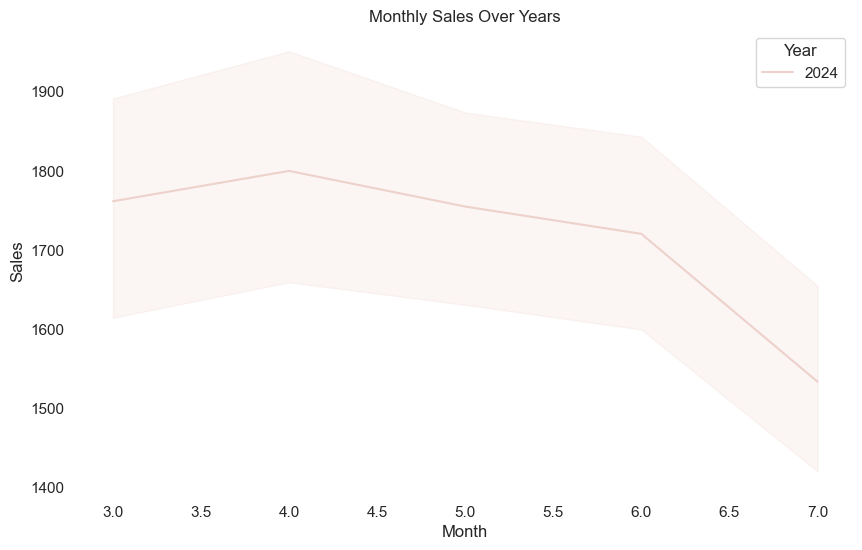

In [56]:
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")  # Optional: set the style for the plot grid
sns.set(rc={'axes.facecolor': 'white', 'figure.facecolor': 'white'})  # Set axis and figure background color

sns.lineplot(data=data, x='Month', y='Sales', hue='Year')
plt.title('Monthly Sales Over Years')
plt.show()


In [57]:
data.rename(columns={'coffee_name': 'Product'}, inplace=True)


# Sales by product


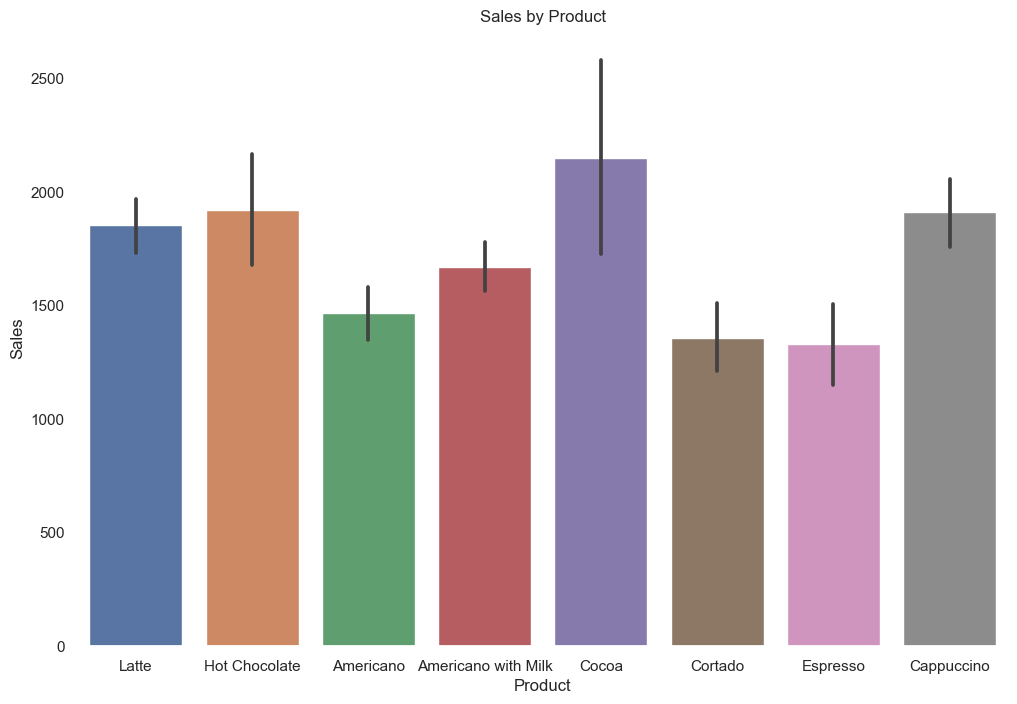

In [65]:
plt.figure(figsize=(12,8))
sns.barplot(data=data,x='Product',y='Sales')
plt.title("Sales by Product")
plt.show()

#  4. Machine Learning Modeling
# Splitting the Data

In [66]:
 from sklearn.model_selection import train_test_split

In [67]:
X = data.drop(columns=['Sales'])
y = data['Sales']

# Define features and target variable

In [69]:
X = pd.get_dummies(X, drop_first=True)

 # Split the data into training and test sets

In [70]:
 X_train, X_test, y_train, y_test = train_test_split(X, y,
 test_size=0.2, random_state=42)

# Training a Simple Model

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model


In [72]:
model = LinearRegression()

# Train the model

In [75]:
print(X_train.dtypes)
print(y_train.dtypes)


money                           float64
Quantity                          int64
Date                     datetime64[ns]
Month                             int32
Year                              int32
                              ...      
Product_Cocoa                      bool
Product_Cortado                    bool
Product_Espresso                   bool
Product_Hot Chocolate              bool
Product_Latte                      bool
Length: 1574, dtype: object
float64


In [76]:
X_train = X_train.drop(columns=['Date'])


In [77]:
X_train = X_train.astype({col: 'int' for col in X_train.select_dtypes('bool').columns})


In [78]:
model.fit(X_train, y_train)


LinearRegression()

#  5. Model Interpretation and Conclusion

In [84]:
coefficients =pd.DataFrame(model.coef_,columns=['Coefficient'])


 

In [85]:
 print(coefficients)

      Coefficient
0       55.138307
1       32.916177
2        1.744268
3       -1.574920
4        7.073578
...           ...
1568    25.101122
1569    32.757098
1570    -0.902008
1571   -31.812472
1572   -21.852343

[1573 rows x 1 columns]


# Summary
# In this guide, we performed the following steps:
 
 1.Loadedandcleanedthecoffeesalesdata.
 2.Conductedexploratorydataanalysis(EDA)tovisualizesalestrends.
 3.Preparedthedataformachinelearningbyhandlingcategoricalvariablesand
 splittingthedataset.
 4.Trainedasimplelinearregressionmodel topredictsales.
 5.Evaluatedthemodel'sperformance.
 This isabasicexample.Foramorerobustanalysis,youmightconsideradvanced
 techniqueslikecross-validation, featureselection,andtryingdifferentalgorithms.

In [86]:
 import numpy as np # linear algebra
 import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
 import matplotlib.pyplot as plt
 import seaborn as sns
 import datetime as dt
 import warnings
 warnings.filterwarnings('ignore')

In [87]:
 coffee_data = pd.read_csv('Coffee_Sales.csv')

In [88]:
coffee_data.head()

,date,datetime,cash_type,card,money,coffee_name,Quantity,Sales
0,01-03-2024,15:50.5,card,ANON-0000-0000-0001,38.7,Latte,50,1935.0
1,01-03-2024,19:22.5,card,ANON-0000-0000-0002,38.7,Hot Chocolate,60,2322.0
2,01-03-2024,20:18.1,card,ANON-0000-0000-0002,38.7,Hot Chocolate,60,2322.0
3,01-03-2024,46:33.0,card,ANON-0000-0000-0003,28.9,Americano,60,1734.0
4,01-03-2024,48:14.6,card,ANON-0000-0000-0004,38.7,Latte,15,580.5


In [89]:
coffee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
 6   Quantity     1133 non-null   int64  
 7   Sales        1133 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 70.9+ KB


In [90]:
 coffee_data.isnull().sum()

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
Quantity        0
Sales           0
dtype: int64

In [91]:
coffee_data.duplicated().sum()

0

In [92]:
 coffee_data.describe().T

,count,mean,std,min,25%,50%,75%,max
money,1133.0,33.105808,5.035366,18.12,28.9,32.82,37.72,40.0
Quantity,1133.0,51.809356,28.678811,5.00,25.0,50.00,75.00,100.0
Sales,1133.0,1710.745278,984.251738,90.60,906.0,1641.00,2461.50,4000.0


In [93]:
 coffee_data.loc[:,['cash_type','card','coffee_name']].describe().T

,count,unique,top,freq
cash_type,1133,2,card,1044
card,1044,446,ANON-0000-0000-0012,88
coffee_name,1133,8,Americano with Milk,268



 ● Thereare1033transactionsinthedata.
 ● 89missingvaluesinthecolumn'card'.
 ● Noduplicates.
 ● 2uniquevaluesof'cash_type'.
 ● 8differentcoffeetypeswith'AmericanowithMilk' isthemostpopularproduct.
 Let'scheckthetransactionswithmissingvaluein'card'.

In [94]:
 coffee_data[coffee_data['card'].isnull()]['cash_type'].value_counts()

cash_type
cash    89
Name: count, dtype: int64

<Axes: >

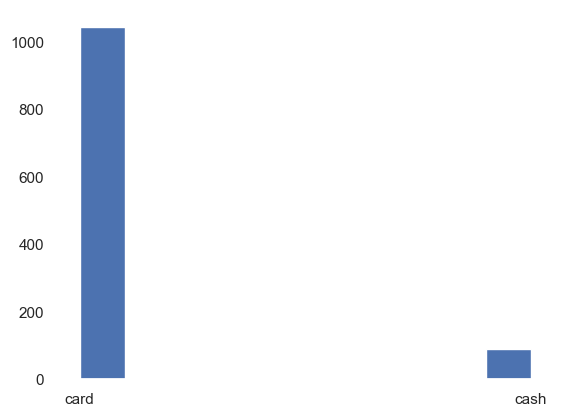

In [95]:
coffee_data['cash_type'].hist()

In [96]:
coffee_data['cash_type'].value_counts(normalize=True)

cash_type
card    0.921447
cash    0.078553
Name: proportion, dtype: float64

In [99]:
 #Convert date and datetime to datetme format

In [103]:
coffee_data['date'] = pd.to_datetime(coffee_data['date'], format='%d-%m-%Y', errors='coerce')

In [104]:
coffee_data['datetime'] = pd.to_datetime(coffee_data['datetime'], format='%d-%m-%Y %H:%M:%S', errors='coerce')

In [105]:
 coffee_data['date']=pd.to_datetime(coffee_data['date'])
 coffee_data['datetime']=pd.to_datetime(coffee_data['datetime'])

In [106]:
 coffee_data['month']=coffee_data['date'].dt.strftime('%Y-%m')
 coffee_data['day']=coffee_data['date'].dt.strftime('%w')
 coffee_data['hour']=coffee_data['datetime'].dt.strftime('%H')

In [107]:
 coffee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1133 non-null   datetime64[ns]
 1   datetime     0 non-null      datetime64[ns]
 2   cash_type    1133 non-null   object        
 3   card         1044 non-null   object        
 4   money        1133 non-null   float64       
 5   coffee_name  1133 non-null   object        
 6   Quantity     1133 non-null   int64         
 7   Sales        1133 non-null   float64       
 8   month        1133 non-null   object        
 9   day          1133 non-null   object        
 10  hour         0 non-null      object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(6)
memory usage: 97.5+ KB


In [108]:
 coffee_data.head()

,date,datetime,cash_type,card,money,coffee_name,Quantity,Sales,month,day,hour
0,2024-03-01,NaT,card,ANON-0000-0000-0001,38.7,Latte,50,1935.0,2024-03,5,NaN
1,2024-03-01,NaT,card,ANON-0000-0000-0002,38.7,Hot Chocolate,60,2322.0,2024-03,5,NaN
2,2024-03-01,NaT,card,ANON-0000-0000-0002,38.7,Hot Chocolate,60,2322.0,2024-03,5,NaN
3,2024-03-01,NaT,card,ANON-0000-0000-0003,28.9,Americano,60,1734.0,2024-03,5,NaN
4,2024-03-01,NaT,card,ANON-0000-0000-0004,38.7,Latte,15,580.5,2024-03,5,NaN


In [110]:
revenue_data =coffee_data.groupby(['coffee_name']).sum(['money']).reset_index().sort_values(by='money',ascending=False)



Text(0.5, 0, 'Revenue')

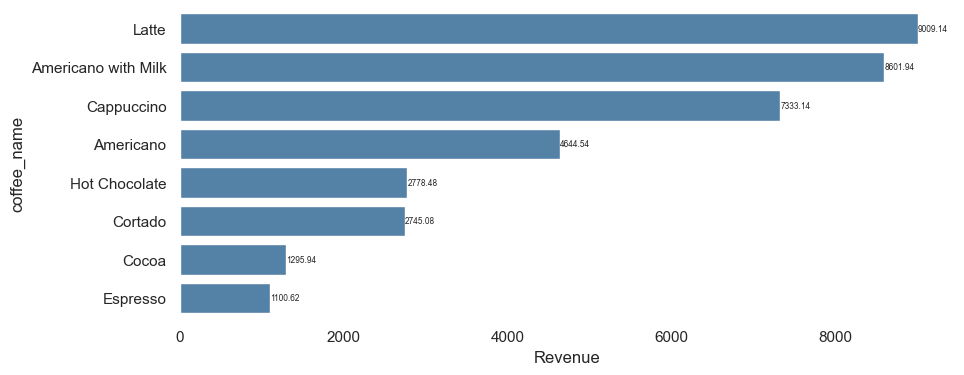

In [111]:
 plt.figure(figsize=(10,4))
 ax = sns.barplot(data=revenue_data,x='money',y='coffee_name',color='steelblue')
 ax.bar_label(ax.containers[0], fontsize=6)
 plt.xlabel('Revenue')

In [116]:
# Group by 'coffee_name' and 'month', count occurrences of 'date'
monthly_sales = (coffee_data
                 .groupby(['coffee_name', 'month'])
                 .count()['date']
                 .reset_index()
                 .rename(columns={'date': 'count'})
                 .pivot(index='month', columns='coffee_name', values='count')
                 .reset_index())




In [117]:
monthly_sales

coffee_name,month,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,2024-03,36,34,20,6,30,10,22,48
1,2024-04,35,42,43,6,19,7,13,31
2,2024-05,48,58,55,9,17,8,14,58
3,2024-06,14,69,46,5,19,10,14,50
4,2024-07,36,65,32,9,14,14,11,56


([<matplotlib.axis.XTick at 0x1a47a054910>,
 [Text(0, 0, '2024-03'),
  Text(1, 0, '2024-04'),
  Text(2, 0, '2024-05'),
  Text(3, 0, '2024-06'),
  Text(4, 0, '2024-07')])

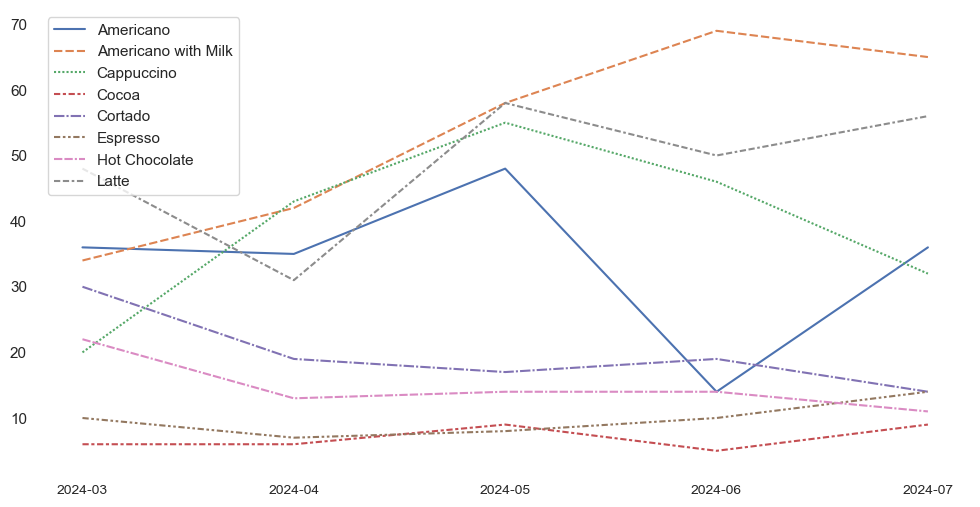

In [119]:
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales)
plt.legend(loc='upper left')
plt.xticks(range(len(monthly_sales['month'])),monthly_sales['month'],size='small')


In [120]:
weekly_sales=coffee_data.groupby(['day']).count()['date'].reset_index().rename(columns={'date':'count'})

In [121]:
weekly_sales

,day,count
0,0,151
1,1,151
2,2,185
3,3,165
4,4,164
5,5,163
6,6,154


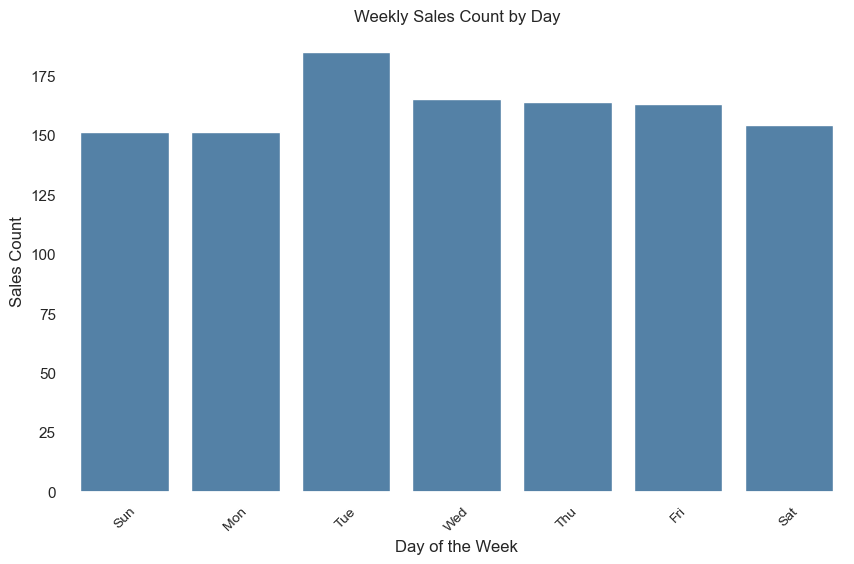

In [123]:
plt.figure(figsize=(10,6))

sns.barplot(data=weekly_sales, x='day', y='count', color='steelblue')

# Set the day labels
plt.xticks(ticks=range(len(weekly_sales['day'])), 
           labels=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'], 
           rotation=45, size='small')

plt.title('Weekly Sales Count by Day')
plt.xlabel('Day of the Week')
plt.ylabel('Sales Count')
plt.show()
